# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [4]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [5]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return (x ** 2) * numpy.sin(x)

Ensure your function works with numpy arrays:

In [6]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [7]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return (2 * x * numpy.sin(x) - (x ** 2 - 2) * numpy.cos(x) - 2)

Check your solution with the same numpy array:

In [8]:
assert g(0) == 0.

In [9]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [10]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    return (g(xmax) - g(xmin))

Check your analytic function:

In [11]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [45]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    h = ((xmax - xmin) / N)
    f_xi = []
    f_zero = []
    f_n = []
    f_middle = []
    
    for i in range(0,N+1):
        if i == 0:
            f_zero.append(f(xmin))
        elif i == N:    
            f_n.append(f(xmax))
        elif i != N:
            x1_calculate = xmin + (i/(float(N)) * (xmax - xmin))
            f_xi.append(f(x1_calculate))
            
    for i in range(0,N):
        x2_calculate = xmin + (h/2) + (i/(float(N)) * (xmax - xmin))
        f_middle.append(f(x2_calculate))   
        
    return (h/6)*(sum(f_zero) + sum(f_n) + 2 * (sum(f_xi)) + 4 * sum(f_middle))   



Make sure you have implemented Simpson's rule correctly:

In [41]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [42]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'How numerical integration error changes with number of panels')

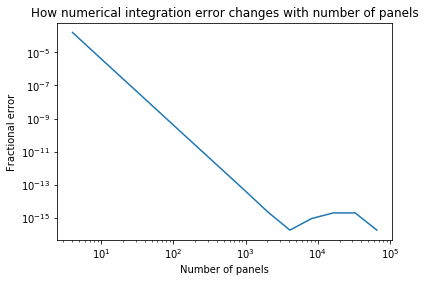

In [44]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8182, 16384, 32768, 65536]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

fractional_error = []
for i in range (0,len(panel_counts)):
    fractional_error.append((abs(((result_analytic - integrate_numeric(x0, x1, panel_counts[i]))/result_analytic))))

    
plt.figure()
plt.plot(panel_counts, fractional_error)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of panels")
plt.ylabel("Fractional error")
plt.title("How numerical integration error changes with number of panels")


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels, $N$, increases the accuracy of the numerical method since the function to be integrated is better approximated as the number of panels increases. With Simpson's rule, the error is proportional to $ N^{-4} $. If the number of panels becomes too large, we get numerical rounding issues since the computer can only carry through so many digits in each calculation (in our code, $h = (xmax - xmin)/N$ has too many decimal places if $N$ becomes too large). This is what happens when the number of panels reaches $10^{4}$ on our graph.  

If the trapezium rule was being used, how would the panel
count affect accuracy? 

If the trapezium rule was used, the error would be proportional to $N^{-2}$. This is worse than with Simpson's rule since Simpson's rule approximates the function in each panel using a quadratic, whereas the trapezium rule approximates the function in each panel by a linear segment. The quadratic approximation will be closer to the true function.